In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/cpreeldumas/Documents/GitHub/MLC_SP23/clean_data/merged_data.csv", low_memory=False, index_col=[0])

In [3]:
df.shape

(38967, 113)

## EDA

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38967 entries, 0 to 38966
Data columns (total 113 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    bbl                             38967 non-null  int64  
 1    rs_share_diff                   38967 non-null  float64
 2    total_units_19                  38967 non-null  int64  
 3    boro                            38967 non-null  int64  
 4    cd_x                            38967 non-null  int64  
 5    ct_10                           38967 non-null  int64  
 6    year_built                      38967 non-null  int64  
 7    ejectment_count                 38967 non-null  float64
 8    possession_count                38967 non-null  float64
 9    eviction_count                  38967 non-null  float64
 10   aleration_count                 38967 non-null  float64
 11   altered_lessthan5yrs            38967 non-null  float64
 12   altered_morethan

In [6]:
features = df.columns.to_list()
features.remove('bbl')
features.remove('rs_share_diff')

### RS Share Histograms

Text(0.5, 1.0, 'rs_share_diff')

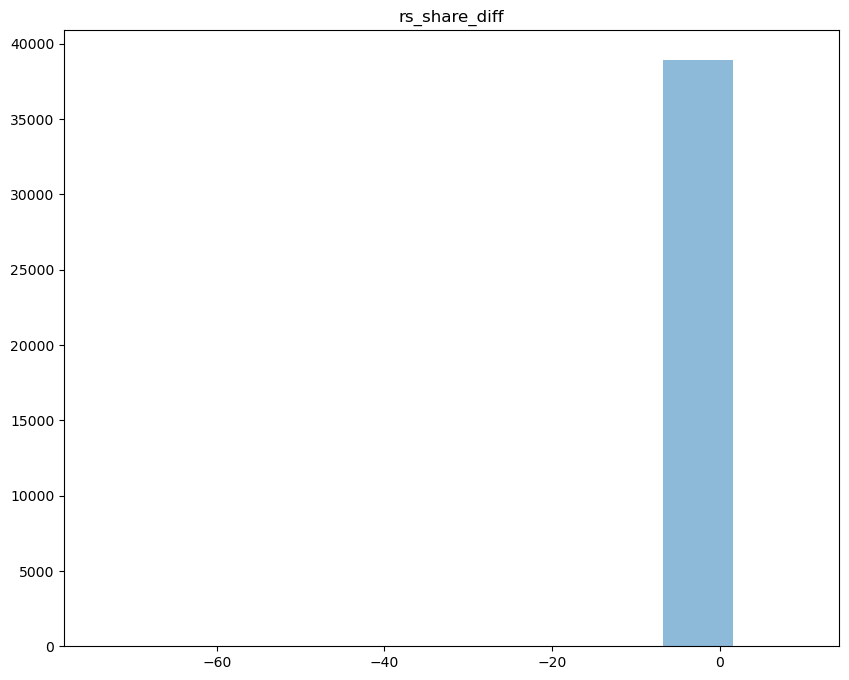

In [7]:
# without rs_share bound - concentration on 0

fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'], alpha=0.5)
axe.set_title('rs_share_diff')

In [8]:
df['rs_share_diff'].describe() # Prob need to set a floor/ceiling for the target var. 

count    38967.000000
mean        -0.196777
std          0.618917
min        -74.000000
25%         -0.250000
50%          0.000000
75%          0.000000
max         10.000000
Name: rs_share_diff, dtype: float64

Text(0.5, 1.0, 'rs_share_diff')

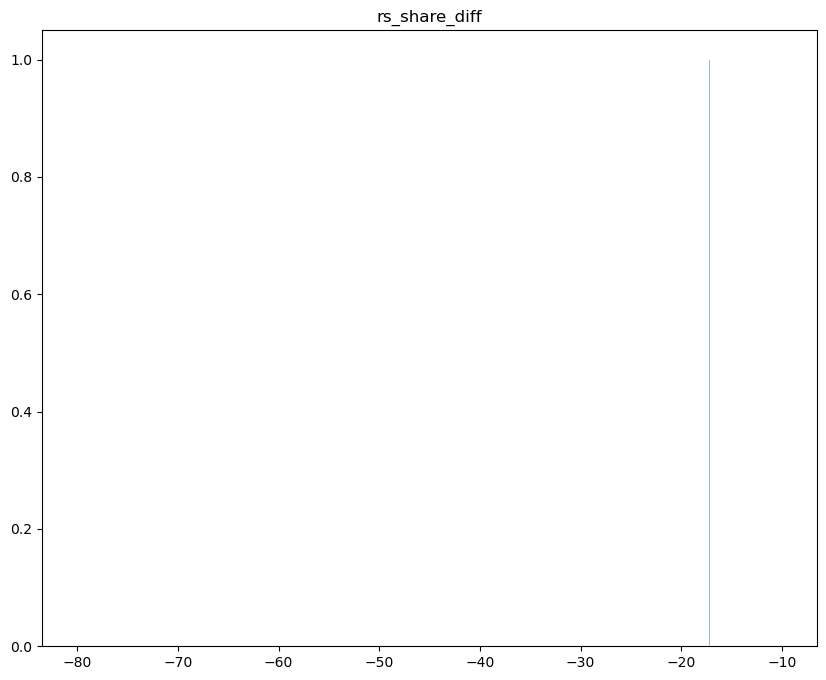

In [9]:
fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'],bins=np.arange(-80,-10,0.05), alpha=0.5)
axe.set_title('rs_share_diff')

Text(0.5, 1.0, 'rs_share_diff')

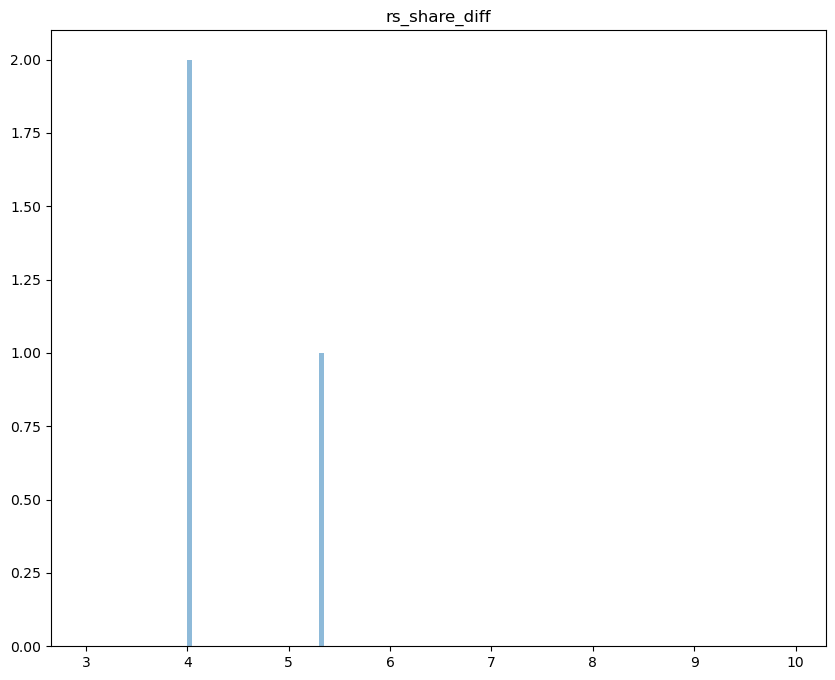

In [10]:
fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'],bins=np.arange(3,10,0.05), alpha=0.5)
axe.set_title('rs_share_diff')

Text(0.5, 1.0, 'rs_share_diff')

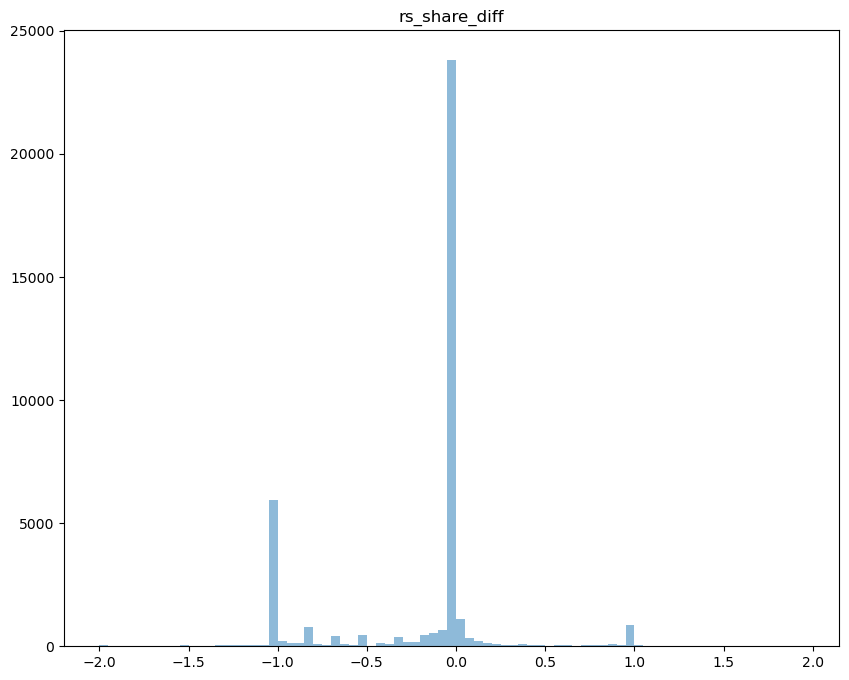

In [11]:
fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'],bins=np.arange(-2,2,0.05), alpha=0.5)
axe.set_title('rs_share_diff')

In [12]:
df['rs_share_diff'] = df['rs_share_diff'].clip(lower = -2, upper = 2) # clipping (-2,2)

### Histogram of Features

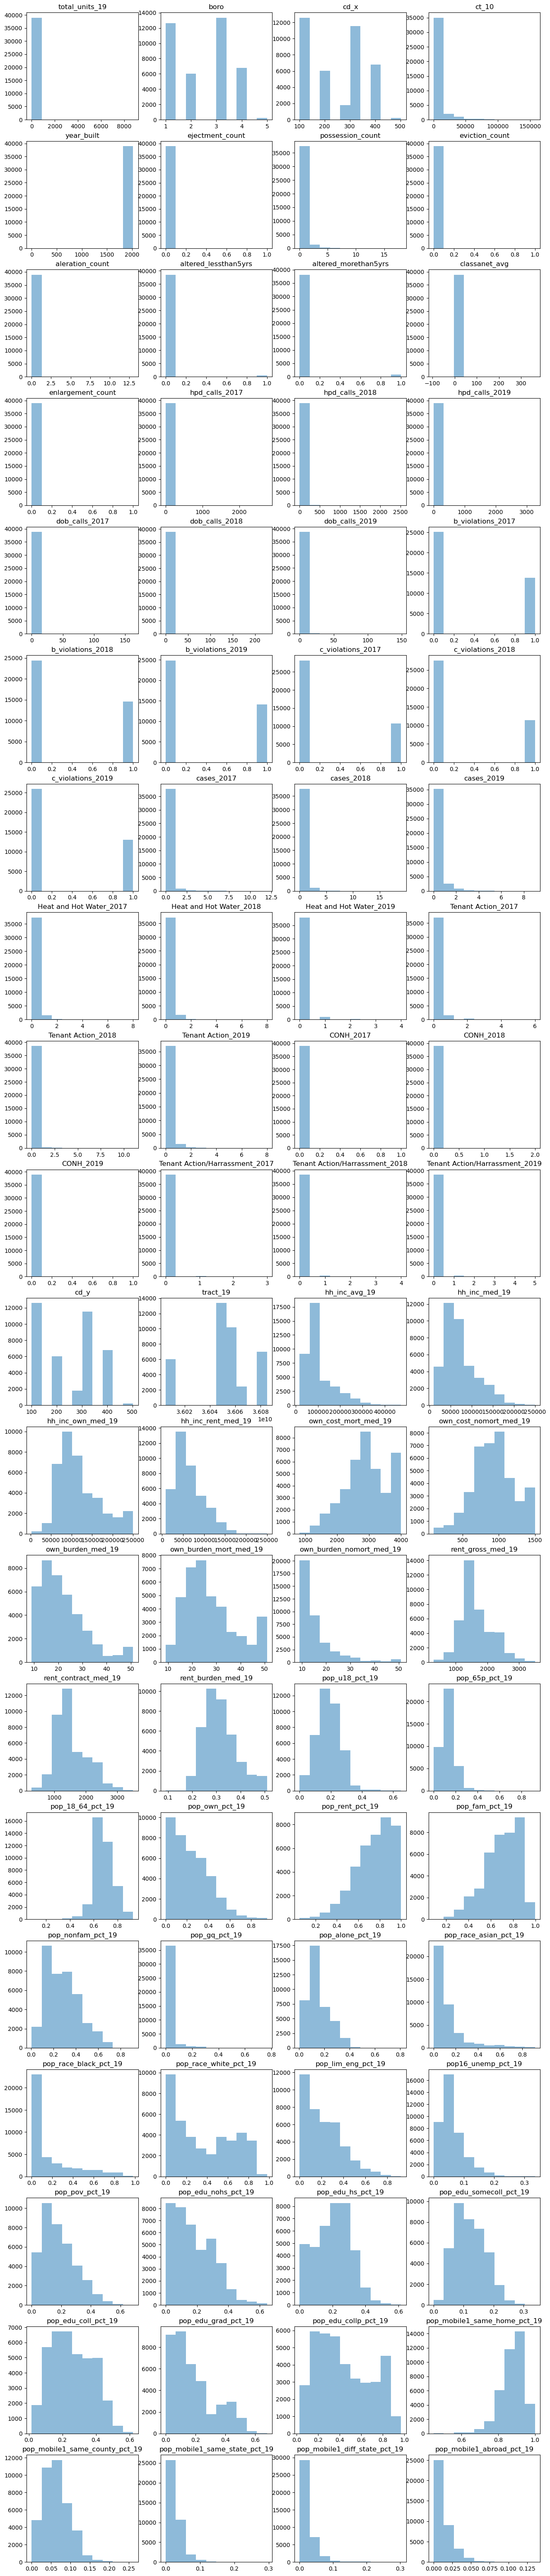

In [13]:
rows=20
cols=4
fig, axes = plt.subplots(figsize=(cols*4, rows*4), ncols=cols, nrows=rows)

for i, row in enumerate(axes):
    for j, axe in enumerate(row):
        my_col = features[i*cols + j]
        my_data = df[my_col]
        axe.hist(my_data, alpha=0.5)
#         axe.hist(my_data, bins=np.arange(my_data.quantile(0.01), my_data.quantile(0.99),25), alpha=0.5)
        axe.set_title(my_col)

### Scatte plots - rs share diff vs each feature


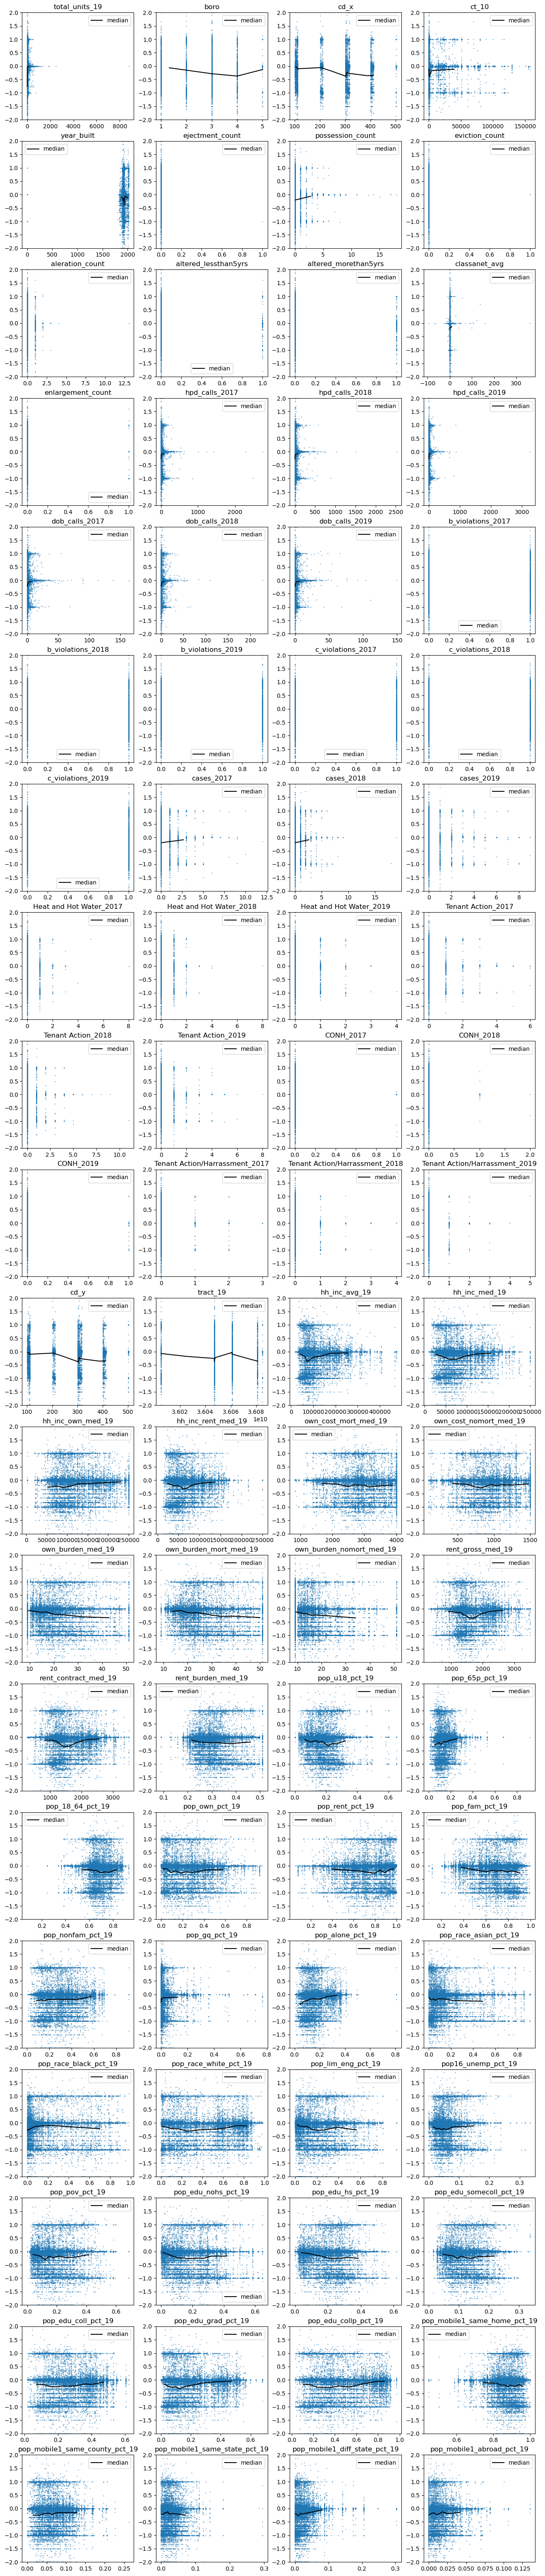

In [14]:
# scatte plot for rs share diff vs feature
rows=20
cols=4
fig, axes = plt.subplots(figsize=(cols*4, rows*4), ncols=cols, nrows=rows)

for i, row in enumerate(axes):
    for j, axe in enumerate(row):
        my_col = features[i*cols + j]
        
        df_sub = df[[my_col, 'rs_share_diff']].reset_index(drop=True)
#         df_sub = df_sub[(df_sub[my_col] > df_sub[my_col].quantile(0.02) ) & (df_sub[my_col] < df_sub[my_col].quantile(0.98) )]
        df_sub['my_bin'] = pd.cut(df_sub[my_col], 
                          bins=df_sub[my_col].quantile(np.arange(0,1.1,0.1)).values, 
                          include_lowest=True,
                          duplicates='drop') 
        df_binned = df_sub.groupby('my_bin')[[my_col, 'rs_share_diff']].mean()

        my_data = df[my_col]
        target_data = df['rs_share_diff']
        axe.scatter(my_data, target_data, alpha=0.5, s=0.6)
        axe.plot(df_binned[my_col].values, df_binned['rs_share_diff'].values, color='black', label='median')

        axe.set_title(my_col)
        axe.set_ylim(-2,2)
        axe.legend()
#         if my_col == 'boro':
#             break
#     break

### Correlation Heatmap

<AxesSubplot:>

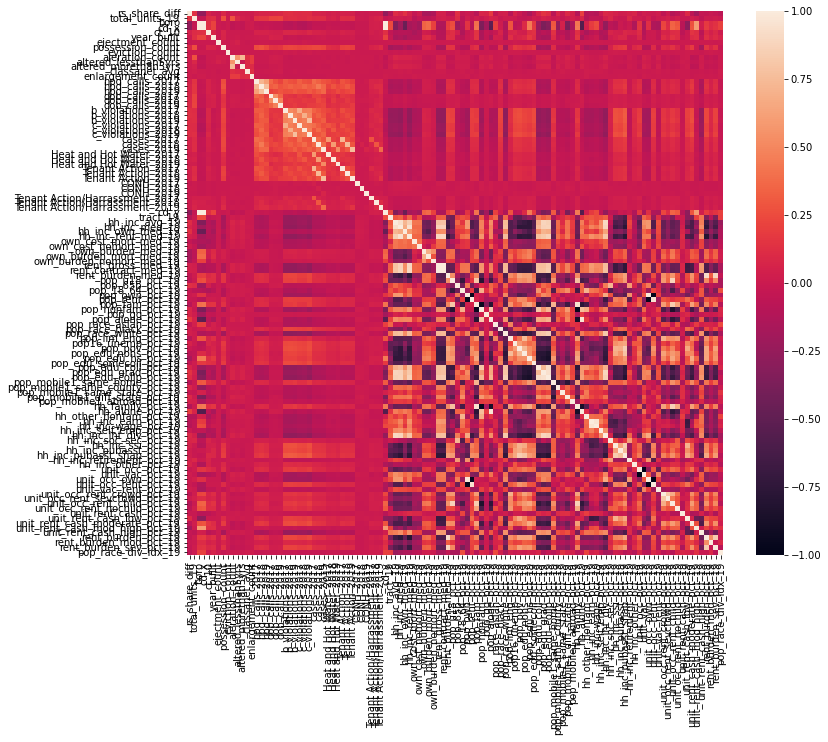

In [14]:
# correlation heatmap of selected columns
my_cols = df.columns.to_list()
my_cols.remove('bbl')

corr = df[my_cols].corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


<AxesSubplot:>

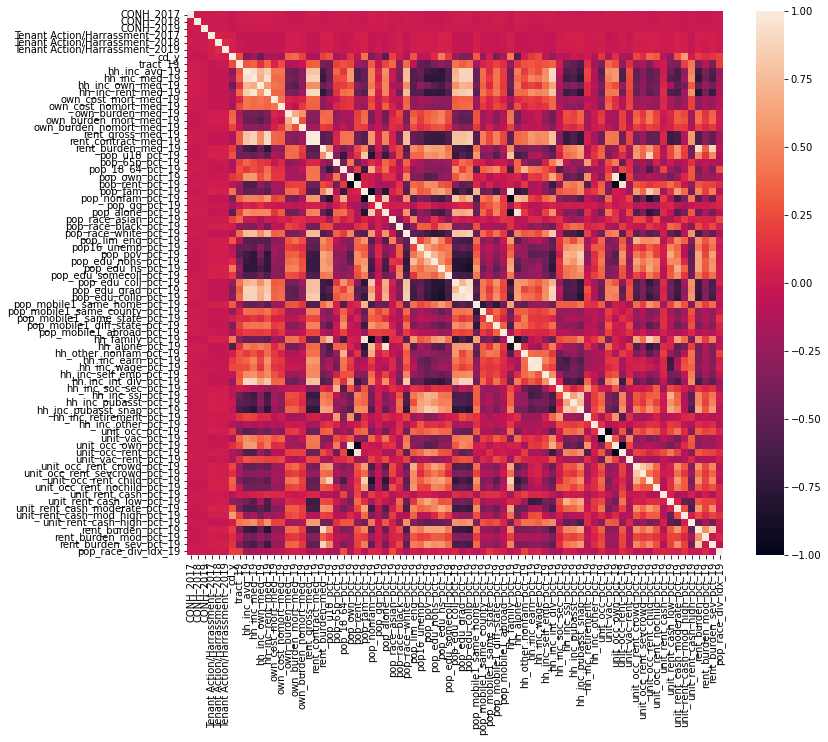

In [15]:
# zooming in to look at the last 60% --- prob need to combine / drop some ACS cols that are similar to each other
my_cols = df.columns.to_list()
my_cols.remove('bbl')

corr = df[my_cols[35:]].corr()

fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [16]:
df.head(4)

,bbl,rs_share_diff,total_units_19,boro,cd_x,ct_10,year_built,ejectment_count,possession_count,eviction_count,...,unit_occ_rent_nochild_pct_19,unit_rent_cash_pct_19,unit_rent_cash_low_pct_19,unit_rent_cash_moderate_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,rent_burden_mod_pct_19,rent_burden_sev_pct_19,pop_race_div_idx_19
0,1000780047,0.0000,483,1,101,1502,2016,0.0,0.0,0.0,...,0.172615,0.986616,0.019478,0.012522,0.020522,0.083478,0.326156,0.166961,0.159195,0.450691
1,1001350019,0.0000,4,1,101,21,1915,0.0,0.0,0.0,...,0.277924,0.969777,0.190379,0.031165,0.004743,0.000000,0.241661,0.149762,0.091899,0.457072
2,1001620013,-0.0500,20,1,103,29,1915,0.0,0.0,0.0,...,0.359562,0.967131,0.405767,0.342945,0.079300,0.118950,0.701854,0.336766,0.365088,0.612518
3,1001630024,0.1875,16,1,103,29,1915,0.0,0.0,0.0,...,0.359562,0.967131,0.405767,0.342945,0.079300,0.118950,0.701854,0.336766,0.365088,0.612518


### Running Linear Regression Between Y and each predictor to select columns (based on the p-value)

In [15]:
import statsmodels.api as sm


In [16]:
# linear regression
pval_dict = {}
for feature in features:
    y = df['rs_share_diff']
    x = df[feature]
    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()
    p_val = model.pvalues[feature]
           
    pval_dict[feature] = p_val

In [17]:
pval_df = pd.DataFrame(pval_dict.items())
pval_df.columns = ['feature', 'p_val']
pval_df = pval_df.sort_values(by='p_val')
pval_df

,feature,p_val
1,boro,0.000000
2,cd_x,0.000000
105,unit_rent_cash_mod_high_pct_19,0.000000
81,hh_alone_pct_19,0.000000
40,cd_y,0.000000
...,...,...
57,pop_own_pct_19,0.482105
7,eviction_count,0.559943
36,CONH_2019,0.572444
85,hh_inc_self_emp_pct_19,0.733200


In [22]:
pval_df[:50] ## first 30 col with significant p values

,feature,p_val
1,boro,0.000000e+00
2,cd_x,0.000000e+00
105,unit_rent_cash_mod_high_pct_19,0.000000e+00
81,hh_alone_pct_19,0.000000e+00
40,cd_y,0.000000e+00
62,pop_alone_pct_19,1.077535e-271
49,own_burden_mort_med_19,9.387005e-254
48,own_burden_med_19,4.464218e-226
70,pop_edu_hs_pct_19,6.608527e-194
73,pop_edu_grad_pct_19,3.794589e-184


In [24]:
pval_df[50:100]

,feature,p_val
110,pop_race_div_idx_19,2.293212e-35
101,unit_occ_rent_nochild_pct_19,4.388241e-35
67,pop16_unemp_pct_19,7.959343e-32
25,cases_2017,4.833735e-31
26,cases_2018,5.805819e-31
98,unit_occ_rent_crowd_pct_19,4.137919e-30
45,hh_inc_rent_med_19,3.344213e-27
13,hpd_calls_2017,9.602062e-27
91,hh_inc_retirement_pct_19,1.317972e-26
88,hh_inc_ssi_pct_19,1.726501e-24


In [25]:
pval_df[100:111]

,feature,p_val
5,ejectment_count,0.085506
35,CONH_2018,0.146765
99,unit_occ_rent_sevcrowd_pct_19,0.212414
4,year_built,0.241074
95,unit_occ_own_pct_19,0.360374
96,unit_occ_rent_pct_19,0.360374
57,pop_own_pct_19,0.482105
7,eviction_count,0.559943
36,CONH_2019,0.572444
85,hh_inc_self_emp_pct_19,0.733200


In [31]:
#listing acs columns to drop
drop_acs_list = ['hh_inc_med_19', 'own_burden_med_19', 'own_burden_nomort_med_19', 
                'pop_u18_pct_19', 'pop_18_64_pct_19', 'pop_fam_pct_19', 'pop_nonfam_pct_19', 
                'pop_gq_pct_19', 'pop_alone_pct_19', 'hh_other_nonfam_pct_19', 'pop_edu_nohs_pct_19',
                'pop_edu_somecoll_pct_19', 'pop_edu_coll_pct_19', 'pop_edu_grad_pct_19',
                 'pop_mobile1_same_state_pct_19', 'hh_inc_earn_pct_19', 'unit_occ_pct_19',
                 'unit_occ_rent_nochild_pct_19', 'unit_rent_cash_low_pct_19', 'unit_rent_cash_moderate_pct_19',
                'hh_inc_rent_med_19', 'own_cost_nomort_med_19', 'rent_gross_med_19', 'pop_own_pct_19',
                'hh_inc_self_emp_pct_19', 'hh_inc_int_div_pct_19', 'hh_inc_soc_sec_pct_19', 'hh_inc_pubasst_pct_19', 
                'hh_inc_other_pct_19', 'unit_occ_own_pct_19', 'unit_occ_rent_pct_19', 'unit_occ_rent_sevcrowd_pct_19',
                'unit_rent_cash_pct_19', 'rent_burden_mod_pct_19', 'rent_burden_sev_pct_19']

#keep only columns not in drop_acs_list
df[df.columns[~df.columns.isin(drop_acs_list)]]

,bbl,rs_share_diff,total_units_19,boro,cd_x,ct_10,year_built,ejectment_count,possession_count,eviction_count,...,hh_inc_pubasst_snap_pct_19,hh_inc_retirement_pct_19,unit_vac_pct_19,unit_vac_rent_pct_19,unit_occ_rent_crowd_pct_19,unit_occ_rent_child_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19
0,1000780047,0.000000,483,1,101,1502,2016,0.0,0.0,0.0,...,0.000000,0.041974,0.157668,0.046466,0.125601,0.102265,0.020522,0.083478,0.326156,0.450691
1,1001350019,0.000000,4,1,101,21,1915,0.0,0.0,0.0,...,0.019019,0.064663,0.189831,0.039748,0.048620,0.160315,0.004743,0.000000,0.241661,0.457072
2,1001620013,-0.050000,20,1,103,29,1915,0.0,0.0,0.0,...,0.443233,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518
3,1001630024,0.187500,16,1,103,29,1915,0.0,0.0,0.0,...,0.443233,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518
4,1001630033,0.000000,11,1,103,29,1915,0.0,0.0,0.0,...,0.443233,0.058129,0.140180,0.045627,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,4001360036,1.000000,7,4,402,25301,1924,0.0,0.0,0.0,...,0.043432,0.072034,0.118992,0.052895,0.070547,0.229865,0.461259,0.161017,0.523723,0.678053
38963,4019390011,1.000000,68,4,404,44301,2016,0.0,0.0,0.0,...,0.527975,0.088258,0.133788,0.072327,0.212712,0.297458,0.309322,0.075424,0.643301,0.374426
38964,4049590008,0.857143,7,4,407,869,1930,0.0,0.0,0.0,...,0.114243,0.037092,0.159601,0.047541,0.148021,0.263339,0.360507,0.221014,0.771037,0.162352
38965,4052630021,1.042553,47,4,407,1155,1929,0.0,2.0,0.0,...,0.100741,0.122963,0.046610,0.051402,0.182266,0.359606,0.390244,0.113821,0.602273,0.651452
